# ch04. 컨볼루션 신경망 모델 만들기

- ImageDataGenerator
- flow_from_directory
    - 인자 1: 이미지 경로 지정
    - target_size
    - batch_size
    - class_mode
        - categorical: 2D one-hot
        - binary: 1D 이진 라벨
        - sparse: 1D 정수
        - None: 라벨 반환

- Data Augmentation

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_generator = train_datagen.flow_from_directory(
    './data/shape/train',
    target_size=(24, 24),
    batch_size=3,
    class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [8]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
test_generator = test_datagen.flow_from_directory(
    './data/shape/test',
    target_size=(24, 24),
    batch_size=3,
    class_mode='categorical'
)

Found 15 images belonging to 3 classes.


## model

In [11]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten

In [15]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24, 24, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

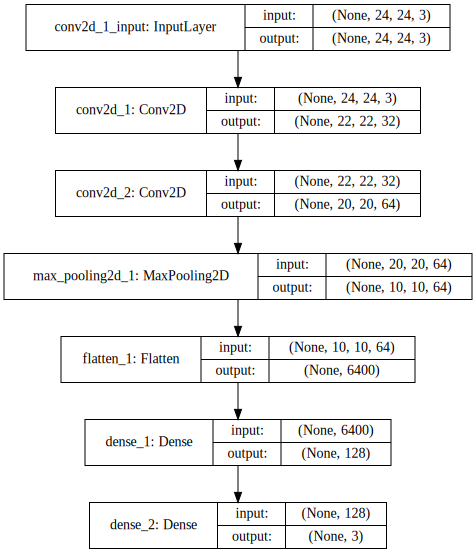

In [18]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

In [19]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [20]:
np.random.seed(3)

In [21]:
train_datagen = ImageDataGenerator(rescale=1./255)

train_genetator = train_datagen.flow_from_directory(
    './data/shape/train/',
    target_size=(24, 24),
    batch_size=3,
    class_mode='categorical'
)

Found 45 images belonging to 3 classes.


In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    './data/shape/test/',
    target_size=(24, 24),
    batch_size=3,
    class_mode='categorical'
)

Found 15 images belonging to 3 classes.


In [24]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(24, 24, 3)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [25]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [28]:
model.fit_generator(train_generator, steps_per_epoch=15, 
                epochs=50, validation_data=test_generator,
                validation_steps=5  )

Epoch 1/50
15/15 [==============================] - 0s 27ms/step - loss: 0.3003 - acc: 1.0000 - val_loss: 0.1212 - val_acc: 1.0000
Epoch 2/50
15/15 [==============================] - 0s 25ms/step - loss: 0.0318 - acc: 1.0000 - val_loss: 0.0245 - val_acc: 1.0000
Epoch 3/50
15/15 [==============================] - 0s 26ms/step - loss: 0.0043 - acc: 1.0000 - val_loss: 0.0513 - val_acc: 1.0000
Epoch 4/50
15/15 [==============================] - 0s 26ms/step - loss: 0.0028 - acc: 1.0000 - val_loss: 0.0862 - val_acc: 0.9333
Epoch 5/50
15/15 [==============================] - 0s 17ms/step - loss: 0.0013 - acc: 1.0000 - val_loss: 0.0069 - val_acc: 1.0000
Epoch 6/50
15/15 [==============================] - 0s 26ms/step - loss: 7.6946e-04 - acc: 1.0000 - val_loss: 0.0070 - val_acc: 1.0000
Epoch 7/50
15/15 [==============================] - 0s 26ms/step - loss: 1.9251e-04 - acc: 1.0000 - val_loss: 0.0118 - val_acc: 1.0000
Epoch 8/50
15/15 [==============================] - 0s 20ms/step - loss: 1.

In [29]:
scores = model.evaluate_generator(test_generator, steps=5)

In [30]:
scores

[0.011022989038065135, 1.0]

In [31]:
output = model.predict_generator(test_generator, steps=5)

In [32]:
test_generator.class_indices

{'circle': 0, 'rectangle': 1, 'triangle': 2}

In [38]:
np.set_printoptions(formatter={'float':lambda x:"{0:0.3f}".format(x)})

In [39]:
output

array([[1.000, 0.000, 0.000],
       [1.000, 0.000, 0.000],
       [1.000, 0.000, 0.000],
       [1.000, 0.000, 0.000],
       [0.000, 1.000, 0.000],
       [0.000, 1.000, 0.000],
       [0.000, 1.000, 0.000],
       [0.000, 1.000, 0.000],
       [0.000, 0.006, 0.994],
       [0.000, 0.000, 1.000],
       [0.000, 0.000, 1.000],
       [1.000, 0.000, 0.000],
       [0.000, 0.000, 1.000],
       [1.000, 0.000, 0.000],
       [1.000, 0.000, 0.000]], dtype=float32)

In [37]:
np.argmax(output, axis=1)

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 0])